In [1]:
import numpy as np

amount = 100
interval = 42

preys = np.arange(0 ,5001, 50)
preys[0] = 1
print(preys)

predators = np.arange(0, 251, 10)
predators[0] = 1
print(predators)


[   1   50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450
 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200
 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950
 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700
 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450
 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000]
[  1  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250]


In [2]:
from ppmodel import ModelParams

params = []
args = [[],[]]

for a in preys:
   for i in predators:
       args[0].append(a)
       args[1].append(i)
       params.append(ModelParams("S", 100, 100, i, a, 100, 42, 2))
        
print(len(params))

2626


In [3]:
import ppmodel
from multiprocessing import Pool 

data = []

try:
    
    file = open("results_e4.csv", 'r')
    
except IOError as e:
    print("Launch model")
    if __name__ == '__main__':
        p = Pool(6)
        data = p.map(ppmodel.f, params)

    f = open("results_e4.csv", 'w')
    for i in range(0, len(data)):
        f.write(str(args[0][i])+','+str(args[1][i])+','+str(data[i])+"\n")
    f.close()
else:
    print("Read file")
    args = [[],[]]
    for line in file:
        parts = line.split(',')
        args[0].append(int(parts[0]))
        args[1].append(int(parts[1]))
        data.append(int(parts[2]))
        
    file.close()

Read file


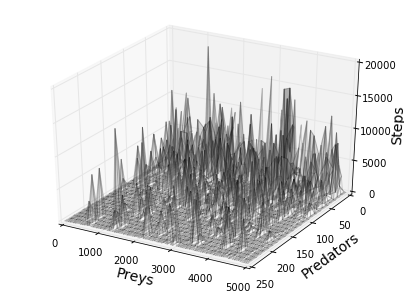

In [4]:
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.gca(projection='3d')
ax.plot_trisurf(args[0], args[1], data, alpha=0.15, cmap=cm.Greys)
ax.set_xlabel('Preys', fontsize=14)
ax.set_ylabel('Predators', fontsize=14)
ax.set_zlabel('Steps', fontsize=14)
ax.invert_yaxis()
plt.show()

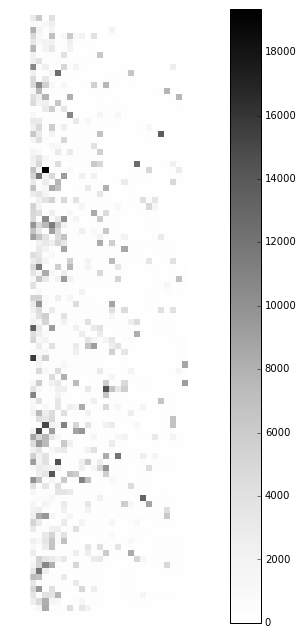

In [5]:
matrix = []
for a in range(0, len(preys)):
    lst = []
    for i in range(0, len(predators)):
        lst.append(data[len(predators)*a + i])
    matrix.append(lst)
  
#print(matrix)


fig = plt.figure()
#fig.set_size_inches(15, 11)
plt.imshow(matrix, interpolation='none')
plt.set_cmap(cm.Greys)
plt.colorbar();
plt.axis('off')
plt.show()